In [53]:
import numpy as np
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression



from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier

In [54]:
data= pd.read_csv("../Phase_2_data/temperature.csv")

In [55]:
print('Data Shape:',data.shape)

Data Shape: (7752, 25)


In [56]:
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [58]:
data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


C:\Users\kulsr\AppData\Local\Temp\ipykernel_31436\3727507055.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data, x='Next_Tmax',fill=True,  palette='Set2')


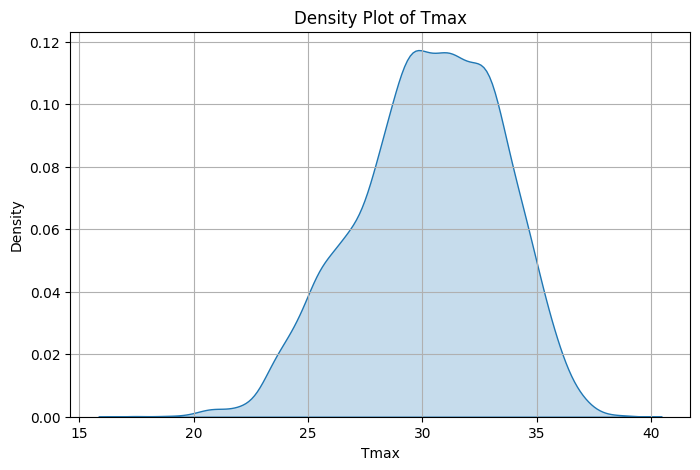

C:\Users\kulsr\AppData\Local\Temp\ipykernel_31436\3727507055.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data, x='Next_Tmin',fill=True,  palette='Set2')


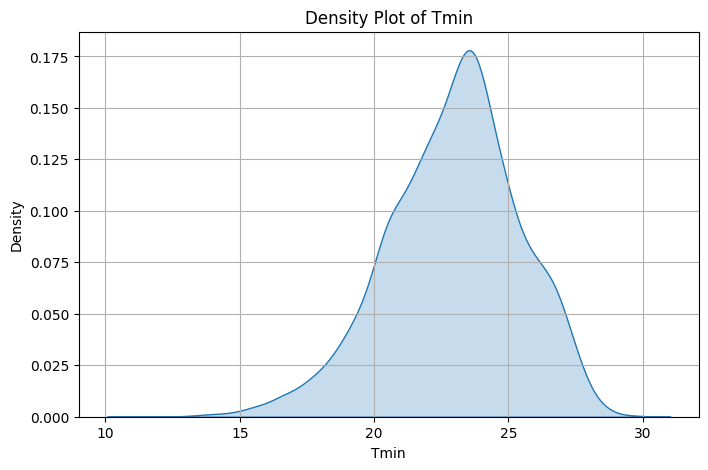

In [59]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x='Next_Tmax',fill=True,  palette='Set2')
plt.title('Density Plot of Tmax')
plt.xlabel('Tmax')
plt.ylabel('Density')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x='Next_Tmin',fill=True,  palette='Set2')
plt.title('Density Plot of Tmin')
plt.xlabel('Tmin')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [60]:
data['Date'] = pd.to_datetime(data['Date'])

# Derive new features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek
data['Day_of_Year'] = data['Date'].dt.dayofyear
data['Quarter'] = data['Date'].dt.quarter


In [61]:
data.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Year                 2
Month                2
Day                  2
Day_of_Week          2
Day_of_Year          2
Quarter              2
dtype: int64

In [62]:
data=data.fillna(data.mean())

C:\Users\kulsr\AppData\Local\Temp\ipykernel_31436\2490576204.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data=data.fillna(data.mean())


## Feature Selection

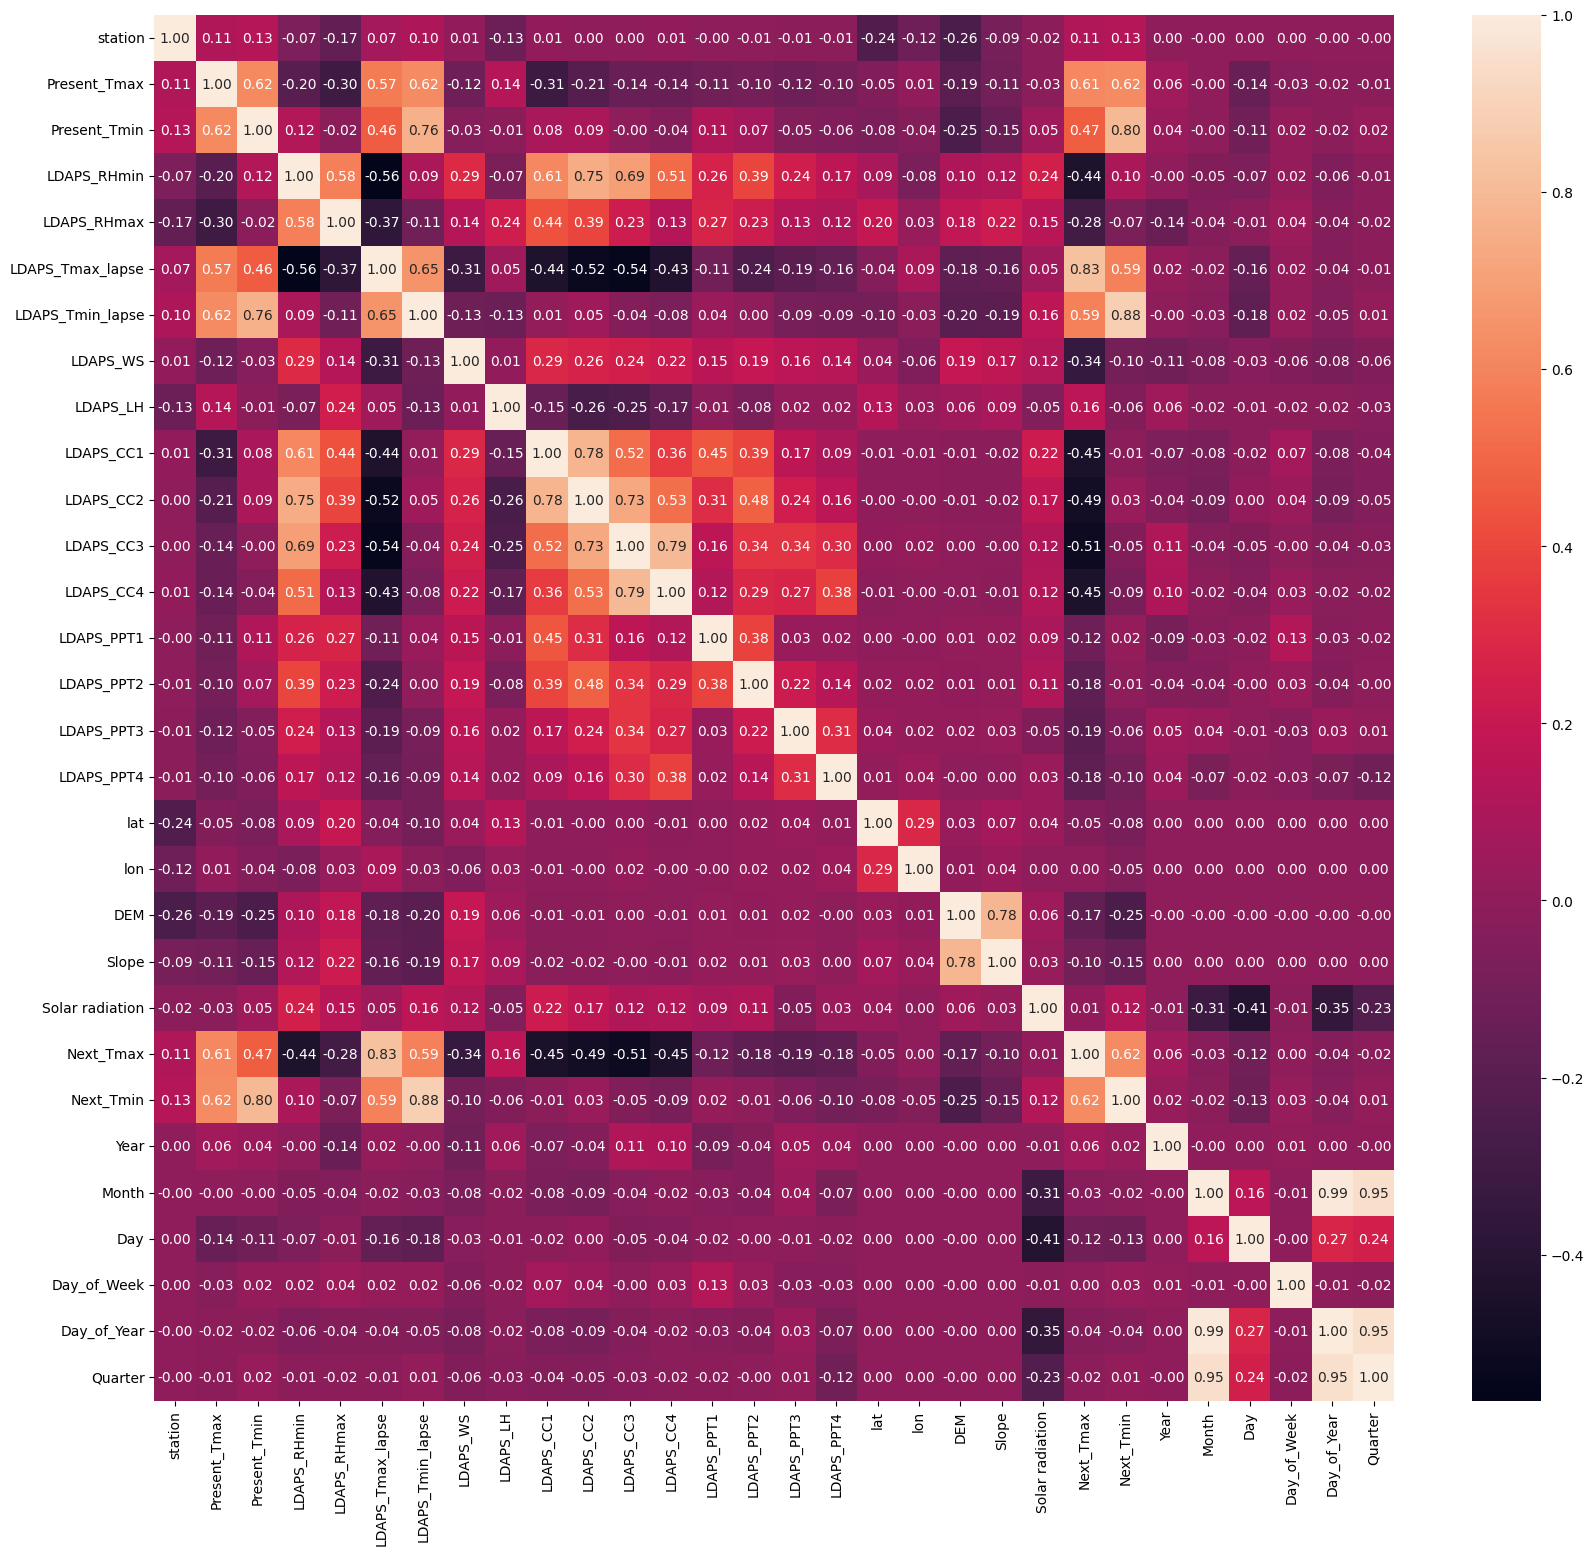

In [65]:
plt.figure(figsize=(20,18))
ax = sns.heatmap(data=data.corr(), annot=True, fmt='.2f')

In [66]:
data.isna().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Year                0
Month               0
Day                 0
Day_of_Week         0
Day_of_Year         0
Quarter             0
dtype: int64

In [67]:
data.duplicated().sum()

0

In [68]:
data = data.drop('Date', axis = 1)

In [69]:
features = data.drop(columns=['Next_Tmax', 'Next_Tmin'])
target_tmax = data['Next_Tmax']
target_tmin = data['Next_Tmin']

In [70]:
X_train_tmax, X_test_tmax, y_train_tmax, y_test_tmax = train_test_split(features, target_tmax, test_size=0.2, random_state=42)
X_train_tmin, X_test_tmin, y_train_tmin, y_test_tmin = train_test_split(features, target_tmin, test_size=0.2, random_state=42)


In [71]:
# Feature scaling
scaler = StandardScaler()
X_train_tmax = scaler.fit_transform(X_train_tmax)
X_test_tmax = scaler.transform(X_test_tmax)
X_train_tmin = scaler.fit_transform(X_train_tmin)
X_test_tmin = scaler.transform(X_test_tmin)

In [ ]:



# Evaluate models
print("Tmax Model")
print("RMSE:", np.sqrt(mean_squared_error(y_test_tmax, predictions_tmax)))
print("MAE:", mean_absolute_error(y_test_tmax, predictions_tmax))
print("R²:", r2_score(y_test_tmax, predictions_tmax))

print("Tmin Model")
print("RMSE:", np.sqrt(mean_squared_error(y_test_tmin, predictions_tmin)))
print("MAE:", mean_absolute_error(y_test_tmin, predictions_tmin))
print("R²:", r2_score(y_test_tmin, predictions_tmin))

# Step 6: Hyperparameter Tuning
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## Taining a Model

In [72]:
def plot_results(test, pred, model_name):
    fig, ax = plt.subplots(figsize=(15, 4))
    x_axis = np.arange(0, test.shape[0], 1)
    sns.lineplot(y=test, x=x_axis, label='Actual', color='mediumblue')
    sns.lineplot(y=pred, x=x_axis, label='Predicted', color='red')
    ax.set(xlabel="Values", ylabel="Target", title=f"{model_name}_Actual_vs_Prediction")
    ax.legend()
    sns.despine()
    plt.show()

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluation_fn(best_model, X_test_scaled, Y_test, model_name, save_plot=False):
    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test_scaled)
    
    # Calculate regression metrics
    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = mean_squared_error(Y_test, y_pred, squared=False)
    r2 = r2_score(Y_test, y_pred)
    
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'R-squared (R²): {r2:.2f}')
    
    # Call plotting functions
    plot_results(Y_test, y_pred, model_name)

# Next Tmax 

Mean Absolute Error (MAE): 0.67
Root Mean Squared Error (RMSE): 0.89
R-squared (R²): 0.92


C:\Users\kulsr\anaconda3\envs\xgboost\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


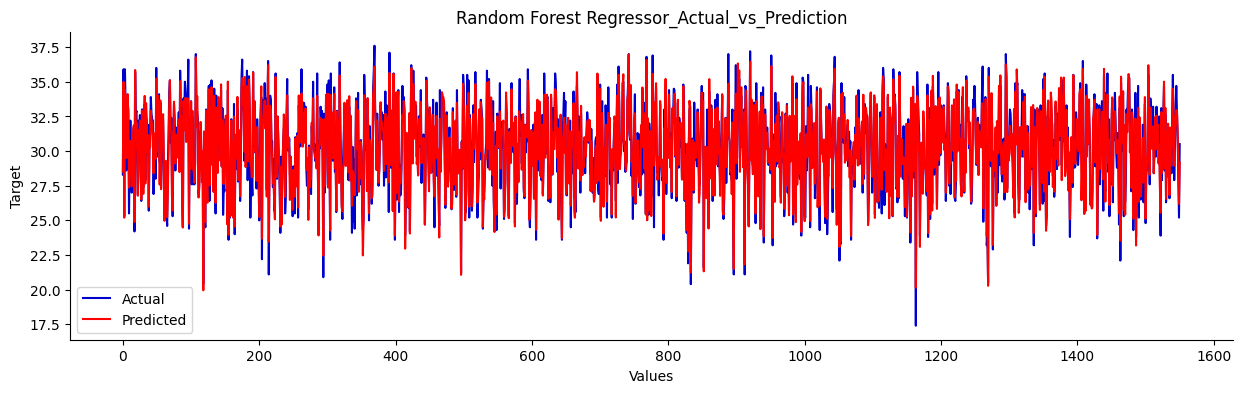

In [84]:
# Model
model_tmax  = XGBRegressor(random_state=42)
model_tmax .fit(X_train_tmax, y_train_tmax)

# Evaluation
evaluation_fn(model, X_test_tmax, y_test_tmax,'Random Forest Regressor')

In [85]:
param_grid = {
    'n_estimators': [60,100, 150, 200],
    'max_depth': [6,8,10,12],
}

# Grid Search for Tmax model
grid_search_tmax = GridSearchCV(estimator=model_tmax, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_tmax.fit(X_train_tmax, y_train_tmax)
best_tmax_model = grid_search_tmax.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [88]:
# Get the best parameters and the best score
best_params = grid_search_tmax.best_params_
best_score = grid_search_tmax.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score (MAE): {-best_score:.2f}")

# Use the best model for prediction
best_model = grid_search_tmax.best_estimator_
Y_pred = grid_search_tmax.predict(X_test_tmax)

# Calculate metrics for the best model
mae = mean_absolute_error(y_test_tmax, Y_pred)
r2 = r2_score(y_test_tmax, Y_pred)

print(f'Mean Absolute Error (MAE) for best model: {mae:.2f}')
print(f'R-squared (R²) for best model: {r2:.2f}')


Best Parameters: {'max_depth': 6, 'n_estimators': 200}
Best Score (MAE): -0.92
Mean Absolute Error (MAE) for best model: 0.59
R-squared (R²) for best model: 0.94


In [104]:
final_model_max= XGBRegressor(**best_params,random_state=42)
final_model_max.fit(X_train_tmax, y_train_tmax)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=16, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
# Built-in feature importance (Gini Importance)
importances = final_model_max.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': features.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

             Feature  Gini Importance
5   LDAPS_Tmax_lapse         0.534324
22              Year         0.059986
23             Month         0.033081
26       Day_of_Year         0.029062
11         LDAPS_CC3         0.028738
14        LDAPS_PPT2         0.028596
24               Day         0.027500
1       Present_Tmax         0.022117
9          LDAPS_CC1         0.019430
25       Day_of_Week         0.018537
12         LDAPS_CC4         0.017755
16        LDAPS_PPT4         0.017117
13        LDAPS_PPT1         0.015917
15        LDAPS_PPT3         0.015915
18               lon         0.014811
7           LDAPS_WS         0.013413
10         LDAPS_CC2         0.012847
21   Solar radiation         0.012333
2       Present_Tmin         0.012249
6   LDAPS_Tmin_lapse         0.010195
8           LDAPS_LH         0.009064
27           Quarter         0.008488
0            station         0.008354
3        LDAPS_RHmin         0.007790
4        LDAPS_RHmax         0.006504
19          

# Next Tmax

Mean Absolute Error (MAE): 7.29
Root Mean Squared Error (RMSE): 7.65
R-squared (R²): -8.39


C:\Users\kulsr\anaconda3\envs\xgboost\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


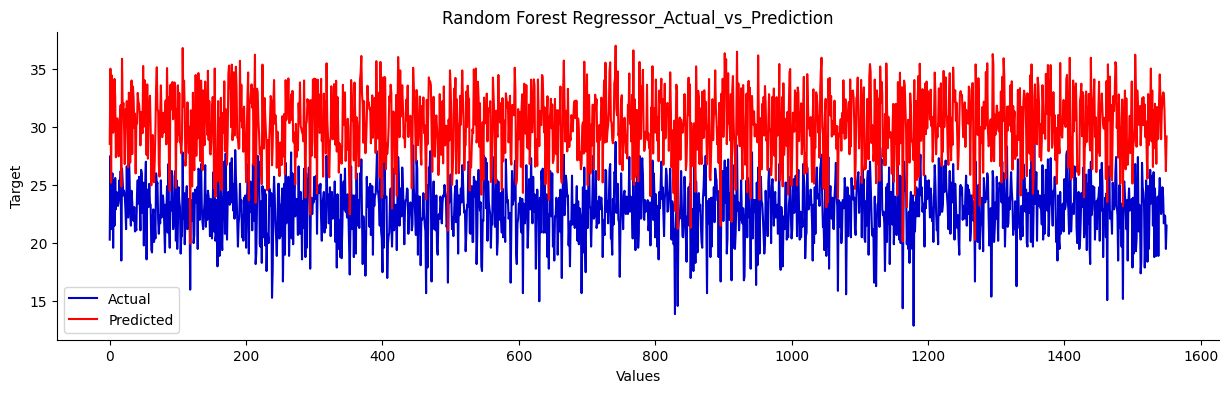

In [99]:
# Model
model_tmin  = XGBRegressor(random_state=42)
model_tmin .fit(X_train_tmin, y_train_tmin)

# Evaluation
evaluation_fn(model, X_test_tmin, y_test_tmin,'Random Forest Regressor')

In [100]:
param_grid = {
    'n_estimators': [60,100, 150, 200],
    'max_depth': [6,8,10,12],
}

# Grid Search for tmin model
grid_search_tmin = GridSearchCV(estimator=model_tmin, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_tmin.fit(X_train_tmin, y_train_tmin)
best_tmin_model = grid_search_tmin.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [101]:
# Get the best parameters and the best score
best_params = grid_search_tmin.best_params_
best_score = grid_search_tmin.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score (MAE): {-best_score:.2f}")

# Use the best model for prediction
best_model = grid_search_tmin.best_estimator_
Y_pred = grid_search_tmin.predict(X_test_tmin)

# Calculate metrics for the best model
mae = mean_absolute_error(y_test_tmin, Y_pred)
r2 = r2_score(y_test_tmin, Y_pred)

print(f'Mean Absolute Error (MAE) for best model: {mae:.2f}')
print(f'R-squared (R²) for best model: {r2:.2f}')


Best Parameters: {'max_depth': 6, 'n_estimators': 200}
Best Score (MAE): -0.93
Mean Absolute Error (MAE) for best model: 0.45
R-squared (R²) for best model: 0.94


In [103]:
final_model_min= XGBRegressor(**best_params,random_state=42)
final_model_min .fit(X_train_tmin, y_train_tmin)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=16, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
# Built-in feature importance (Gini Importance)
importances = final_model_min.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': features.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

             Feature  Gini Importance
6   LDAPS_Tmin_lapse         0.656156
2       Present_Tmin         0.038738
26       Day_of_Year         0.024657
23             Month         0.023859
24               Day         0.019937
19               DEM         0.019331
25       Day_of_Week         0.018850
14        LDAPS_PPT2         0.016580
17               lat         0.016373
22              Year         0.016129
20             Slope         0.015792
13        LDAPS_PPT1         0.012898
21   Solar radiation         0.011322
18               lon         0.010715
9          LDAPS_CC1         0.010588
15        LDAPS_PPT3         0.009952
10         LDAPS_CC2         0.009551
12         LDAPS_CC4         0.008826
0            station         0.008160
7           LDAPS_WS         0.007974
3        LDAPS_RHmin         0.007901
16        LDAPS_PPT4         0.007834
1       Present_Tmax         0.007308
11         LDAPS_CC3         0.007241
5   LDAPS_Tmax_lapse         0.005410
4        LDA

# models are higjly depends LDAPS_Tmin_lapse and LDAPS_Tmax_lapse fearures